### Introduction ###

I am researching whether national suicide rates are correlated with economic opportunity, political freedom, and military presence, using the Gapminder dataset.  The variables I am using to measure these attributes are: Suicide Rate (per 100,000 population), Employment Rate, Armed Forces Rate (size of active military in proportion to population), and Polity Score.

The first section of code below reads in the dataset, converts columns that were read in as strings to a numeric datatype, and subsets the dataframe to include only the columns with useful metrics.  I also dealt with missing data by removing invalid records.

For each variable, I visualized the distribution with a histogram, identified the outliers, and wrote a short summary of my observations.  Because suicide rate, employment rate, and armed service rate are continuous quantitative variables rather than categorical, it made more sense to create histograms than frequency tables.  In histograms, variable value ranges (aggregated into bins) are indicated on the x-axis while the count of observations within each bin are reported on the y-axis.  Selecting the size of the bins in the histograms is an equivalent data management decision to what was covered in lecture to this point.
For the purposes of this assignment, I did reclassify the armed service rates into new bins, and produced a frequency table showing the result.  

Polity Score values were discrete rather than continuous.  I created both a histogram (using the existing bins) and a frequency table.  It did not make sense to reclassify them. 


In [84]:
# Import packages

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

# Enable command results to be displayed in jupyter notebook

%matplotlib inline

# Read in data

df = pd.read_csv('gapminder.csv',low_memory=False)

#### Organizing Data ####

In [85]:
# View the first few rows of the dataframe

df.head(4)

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,,.03,.5696534,26.8,75944000,25.6000003814697,,3.65412162280064,48.673,,0,,6.68438529968262,55.7000007629394,24.04
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.9899469578783,76.918,,9,636.341383366604,7.69932985305786,51.4000015258789,46.72
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.5000733055148,73.131,.42009452521537,2,590.509814347428,4.8487696647644,50.5,65.22
3,Andorra,21943.3398976022,10.17,,,,,,81,,,,,5.36217880249023,,88.92


In [86]:
# Get Dimensions of DatFrame

# There are 213 Rows, 16 columns in our dataset

print(len(df))
print(len(df.columns))

213
16


In [87]:
# Confirm current data type of column 

df['armedforcesrate'].dtype

dtype('O')

In [88]:
# Convert the variables I want to keep to numeric

numCols = ['suicideper100th','employrate','armedforcesrate','polityscore']

for i in numCols:
    df[i] = pd.to_numeric(df[i],errors='coerce')

In [89]:
# Confirm data type conversion - now Float

df['armedforcesrate'].dtype

dtype('float64')

In [90]:
# Subset columns

keepCols = ['country','suicideper100th','employrate','armedforcesrate','polityscore']

df2 = df[keepCols]

df2.head()

,country,suicideper100th,employrate,armedforcesrate,polityscore
0,Afghanistan,6.684385,55.700001,0.569653,0
1,Albania,7.699330,51.400002,1.024736,9
2,Algeria,4.848770,50.500000,2.306817,2
3,Andorra,5.362179,NaN,NaN,NaN
4,Angola,14.554677,75.699997,1.461329,-2


##### Handling Missing Data #####

Some countries did not have a suicide rate reported. As that is my response variable, I dropped those countries from the dataframe.

Then I dropped any countries that did not have a value for any of the explanatory variables. 

This left 171 countries to analyze.

In [91]:
# Drop countries without suicide data from dataset  213 to 191 

df2 = df2.dropna(subset=['suicideper100th'])

print(len(df2))

191


In [92]:
# Drop countries with no values for any explanatory variables

df2 = df2.dropna(subset=['employrate','armedforcesrate','polityscore'],how='all')

print(len(df2))

171


### Variable Analysis ###

##### Suicide Rate #####

Most countries fall between 5 and 12 suicides per 100,000 population. I considered as outliers any country above 25 or below 1.5 per 100,000. 

Four of the six countries with the lowest reported rates are in the Middle East.

Four of the eight countries with the highest rates are former Soviet republics (or in the case of Belarus, in the same region).

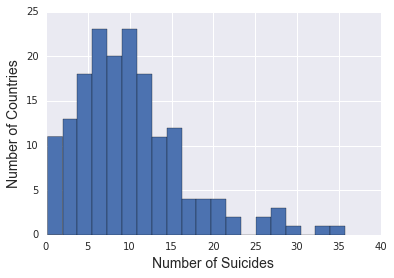

In [119]:
# Plot histogram to visualize distribution

# Suicides per 100K population

df2['suicideper100th'].hist(bins=20)
plt.xlabel('Number of Suicides',fontsize=14)
plt.ylabel('Number of Countries',fontsize=14)

In [94]:
# Identify Upper Extremes

df2.loc[(df2['suicideper100th']>=25),('country','suicideper100th')].sort_values(by='suicideper100th',ascending=False)

,country,suicideper100th
80,Guyana,35.752872
110,Lithuania,33.341860
177,Somalia,29.864164
180,Sri Lanka,28.104046
159,Russia,27.874160
16,Belarus,26.874690
103,Laos,26.219198
96,Kazakhstan,25.404600


In [95]:
# Identify Lower Extremes

df2.loc[(df2['suicideper100th']<=1.5),('country','suicideper100th')].sort_values(by='suicideper100th')

,country,suicideper100th
95,Jordan,0.201449
186,Syria,0.523528
26,Brunei,1.370002
11,Azerbaijan,1.380965
201,United Arab Emirates,1.392951
101,Kuwait,1.498057


##### Employment Rate  #####

The distribution of employment rates centers around 60%, with a high in the 80s and a low in the 30s.  It's important to note that the age cutoff is 15, which means that full-time high school and university-level students count as a negative in this metric.  So many high-performing economies are actually in the middle.

African countries are found at the high end of the range, while Middle Eastern countries are at the low end.

Two countries remaining in the dataset did not have employment rates reported.

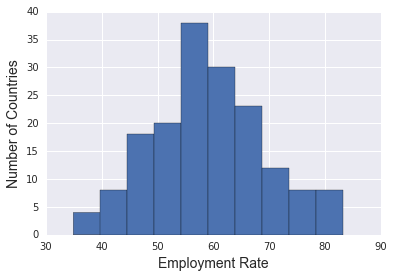

In [118]:
# Employment Rate Value Distribution

df2['employrate'].hist()
plt.xlabel('Employment Rate', fontsize=14)
plt.ylabel('Number of Countries', fontsize=14)

In [97]:
# Identify high extremeties

df2.loc[(df2['employrate']>=80),('country','employrate')].sort_values(by='employrate',ascending=False)


,country,employrate
29,Burundi,83.199997
199,Uganda,83.199997
114,Madagascar,83.000000
78,Guinea,81.500000
28,Burkina Faso,81.300003
60,Ethiopia,80.699997


In [98]:
# Identify low extremeties

df2.loc[(df2['employrate']<=40),('country','employrate')].sort_values(by='employrate')


,country,employrate
113,"Macedonia, FYR",34.900002
89,Iraq,37.400002
95,Jordan,38.900002
210,"Yemen, Rep.",39.000000


In [99]:
# Frequencies

df2['employrate'].value_counts(dropna=False).head()

61.500000    3
59.900002    3
55.900002    3
58.900002    3
47.299999    3
Name: employrate, dtype: int64

##### Armed Service Rates #####

The vast majority of countries had armed service rates reported as less than 1% of population.  

Outliers on the high side (above 6%) are North Korea, Eritrea, Iraq, and Singapore. 

On the low end are Haiti (which disbanded its military in 1995) and a number of African countries.

Eight of the remaining 171 countries did not have an armed service rate reported.

To better understand the cluster under 1%, I reclassified the values into different bins.  Those values are fairly evenly broken up by tenths of a percent.

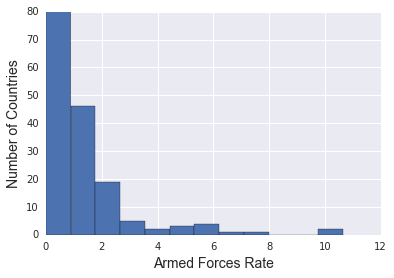

In [117]:
# Visualize distribution with histogram

df2['armedforcesrate'].hist(bins=12)
plt.xlabel('Armed Forces Rate', fontsize=14)
plt.ylabel('Number of Countries', fontsize=14)

In [101]:
# Identify higher outliers

df2.loc[(df2['armedforcesrate']>=6.0),('country','armedforcesrate')].sort_values(by='armedforcesrate',ascending=False)

,country,armedforcesrate
99,"Korea, Dem. Rep.",10.638521
58,Eritrea,9.820127
89,Iraq,7.737913
173,Singapore,6.394936


In [102]:
# Identify lower outliers

df2.loc[(df2['armedforcesrate']<=0.15),('country','armedforcesrate')].sort_values(by='armedforcesrate')

,country,armedforcesrate
81,Haiti,0.000000
85,Iceland,0.066100
131,Mozambique,0.102269
149,Papua New Guinea,0.105115
115,Malawi,0.114592
107,Liberia,0.129953
70,Ghana,0.131487
67,Gambia,0.134591
189,Tanzania,0.134730
35,Central African Rep.,0.148659


In [103]:
# Frequencies

df2['armedforcesrate'].value_counts(dropna=False).head(5)

NaN          8
 1.435633    1
 1.321155    1
 1.812476    1
 2.454913    1
Name: armedforcesrate, dtype: int64

In [104]:
# Reclassify bins

bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,10.638521]

df2['armedforcesratebins'] = pd.cut(df2['armedforcesrate'],bins)

In [105]:
# New Frequency Table - by count

df2['armedforcesratebins'].value_counts().sort_index()

(0, 0.1]        1
(0.1, 0.2]     10
(0.2, 0.3]      8
(0.3, 0.4]     17
(0.4, 0.5]      6
(0.5, 0.6]     14
(0.6, 0.7]      6
(0.7, 0.8]      9
(0.8, 0.9]      8
(0.9, 1]        9
(1, 10.639]    73
dtype: int64

In [106]:
# New Frequency Table - by percentage

df2['armedforcesratebins'].value_counts(normalize=True).sort_index()

(0, 0.1]       0.005848
(0.1, 0.2]     0.058480
(0.2, 0.3]     0.046784
(0.3, 0.4]     0.099415
(0.4, 0.5]     0.035088
(0.5, 0.6]     0.081871
(0.6, 0.7]     0.035088
(0.7, 0.8]     0.052632
(0.8, 0.9]     0.046784
(0.9, 1]       0.052632
(1, 10.639]    0.426901
dtype: float64

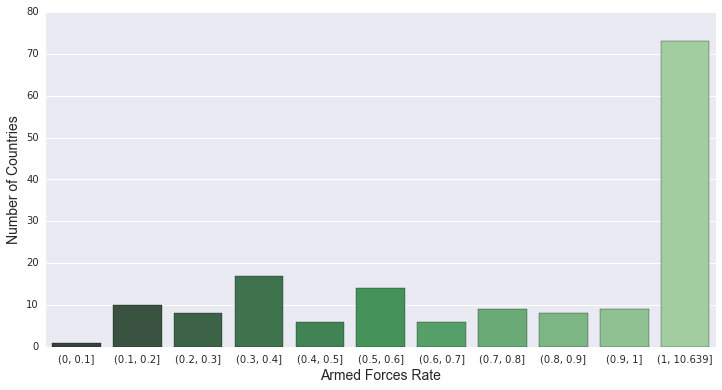

In [114]:
# New plot

plt.figure(figsize=(12,6))
ax = sns.countplot(x='armedforcesratebins',data=df2,palette='Greens_d')
plt.xlabel('Armed Forces Rate',fontsize=14)
plt.ylabel('Number of Countries',fontsize=14)

##### Polity Scores #####

GapMinder classified each country's political freedom on a scale of -10 (autocracy) to +10 (democracy).  For more details, see the <a href="http://www.systemicpeace.org/polityproject.html" target="_blank">Polity IV Project</a> website.

Thirty-two countries were given the highest possible score, including much of Europe and North America, while 46 countries received negative scores.

Countries with low scores are not limited to a particular geographic region.

Twelve of the 171 countries were not given a polity score. 

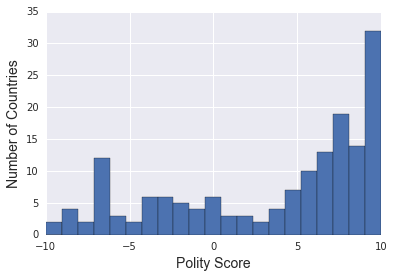

In [124]:
# Polity Score distribution

df2['polityscore'].hist(bins=21)
plt.xlabel('Polity Score',fontsize=14)
plt.ylabel('Number of Countries',fontsize=14)

In [111]:
# Frequency Table for Polity Scores

df2['polityscore'].value_counts(dropna=False).sort_index(ascending=False)

NaN    12
 10    32
 9     14
 8     19
 7     13
 6     10
 5      7
 4      4
 3      2
 2      3
 1      3
 0      6
-1      4
-2      5
-3      6
-4      6
-5      2
-6      3
-7     12
-8      2
-9      4
-10     2
Name: polityscore, dtype: int64

In [126]:
# Count scores less than zero

df2.loc[df2['polityscore']<0,['country']].count()

country    46
dtype: int64

In [123]:
# Highest-ranking coiuntries

df2.loc[(df2['polityscore']>=9.1),('country','polityscore')].sort_values(by='country',ascending=True)

,country,polityscore
9,Australia,10
10,Austria,10
32,Canada,10
37,Chile,10
44,Costa Rica,10
48,Cyprus,10
50,Denmark,10
63,Finland,10
69,Germany,10
72,Greece,10


In [110]:
# Identify lower outliers

df2.loc[(df2['polityscore']<=-7),('country','polityscore')].sort_values(by=['polityscore','country'],ascending=True)

,country,polityscore
156,Qatar,-10
167,Saudi Arabia,-10
99,"Korea, Dem. Rep.",-9
183,Swaziland,-9
197,Turkmenistan,-9
205,Uzbekistan,-9
145,Oman,-8
201,United Arab Emirates,-8
11,Azerbaijan,-7
13,Bahrain,-7
